<a href="https://colab.research.google.com/github/Agrover112/BCW/blob/master/BCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" zwith length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin.csv
User uploaded file "breast-cancer-wisconsin.csv" zwith length 20612 bytes


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.model_selection import cross_val_score

In [0]:
dataset=pd.read_csv("breast-cancer-wisconsin.csv").drop(['Id'],axis=1)
train=dataset.iloc[:,0:8]
y=dataset.iloc[:,9:]

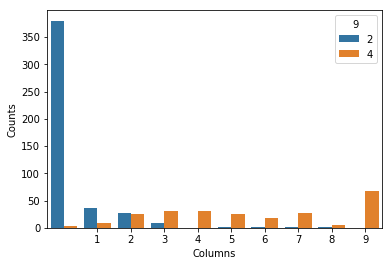

In [0]:
sns.countplot(dataset[dataset.columns[1]],hue=dataset[dataset.columns[9]],data=train)
plt.xticks(np.arange(1,10))
plt.xlabel("Columns")
plt.ylabel("Counts")
plt.show()

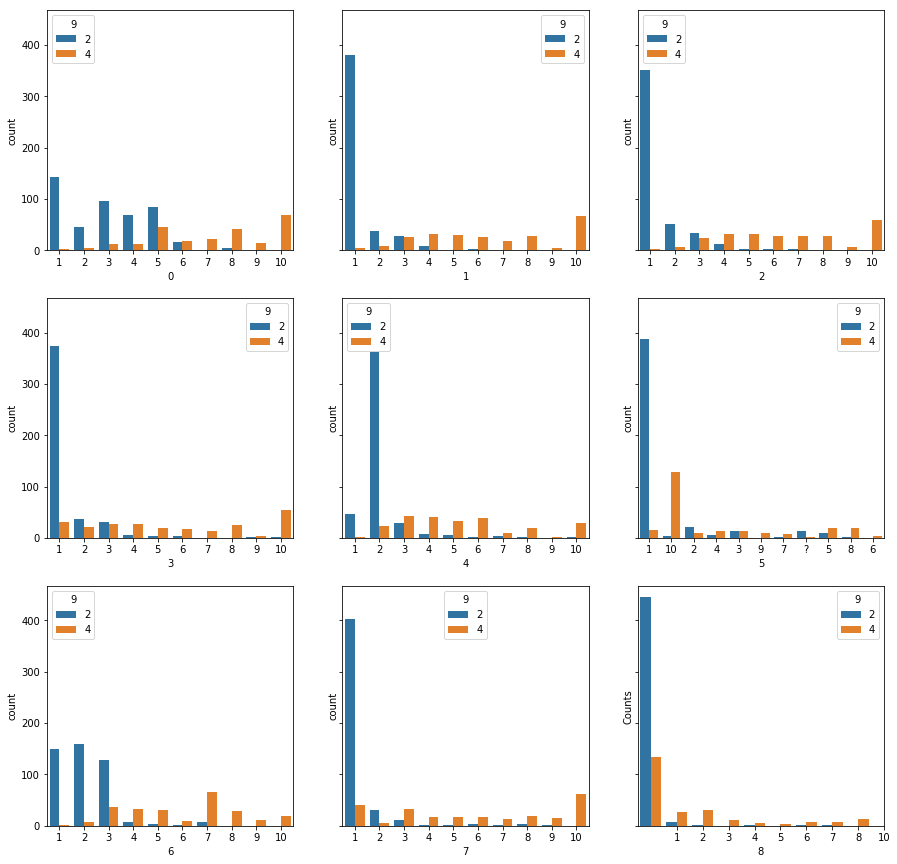

In [0]:
f,axes=plt.subplots(3,3,sharex=False,sharey=True,figsize=(15,15))
sns.countplot(dataset[dataset.columns[0]],hue=dataset[dataset.columns[9]],data=train,ax=axes[0][0])
sns.countplot(dataset[dataset.columns[1]],hue=dataset[dataset.columns[9]],data=train,ax=axes[0][1])
sns.countplot(dataset[dataset.columns[2]],hue=dataset[dataset.columns[9]],data=train,ax=axes[0][2])
sns.countplot(dataset[dataset.columns[3]],hue=dataset[dataset.columns[9]],data=train,ax=axes[1][0])
sns.countplot(dataset[dataset.columns[4]],hue=dataset[dataset.columns[9]],data=train,ax=axes[1][1])
sns.countplot(dataset[dataset.columns[5]],hue=dataset[dataset.columns[9]],data=train,ax=axes[1][2])
sns.countplot(dataset[dataset.columns[6]],hue=dataset[dataset.columns[9]],data=train,ax=axes[2][0])
sns.countplot(dataset[dataset.columns[7]],hue=dataset[dataset.columns[9]],data=train,ax=axes[2][1])
sns.countplot(dataset[dataset.columns[8]],hue=dataset[dataset.columns[9]],data=train,ax=axes[2][2])

plt.xticks(np.arange(1,10))
plt.ylabel("Counts")
plt.savefig('countplot.png')
plt.show()



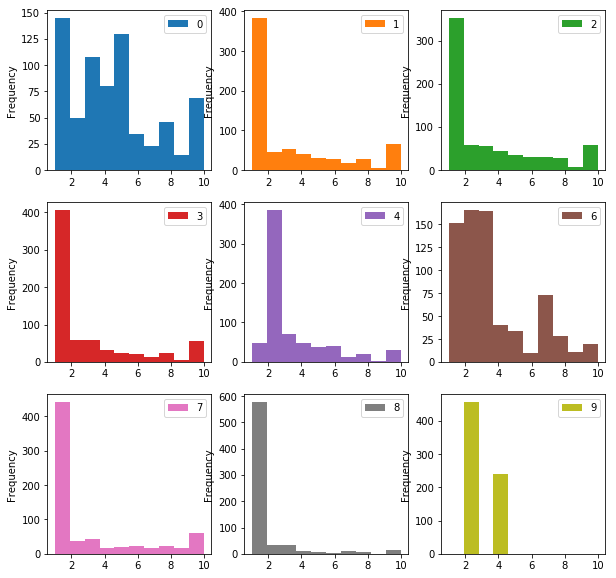

In [0]:
dataset.plot(kind='hist', subplots=True, layout=(3,3), sharex=False,sharey=False,figsize=(10,10))
plt.show()


([<matplotlib.axis.YTick at 0x7f66d5a77940>,
 <a list of 6 Text yticklabel objects>)

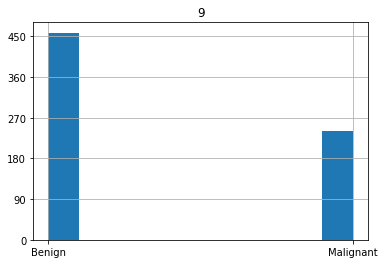

In [0]:
y.hist()
plt.xticks([2,4],["Benign","Malignant"])
plt.yticks(np.arange(0,500,90))

In [0]:
pd.crosstab(dataset[dataset.columns[9]],dataset[dataset.columns[1]],margins=False)

1,1,2,3,4,5,6,7,8,9,10
9,,,,,,,,,,
2,380,37,27,9,0,2,1,1,1,0
4,4,8,25,31,30,25,18,28,5,67


In [0]:
y.replace([2,4],[0,1],inplace=True)

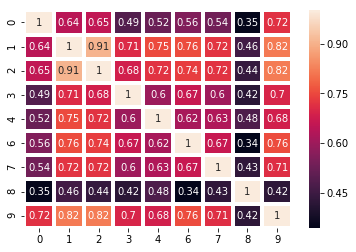

In [0]:
sns.heatmap(data=dataset.corr(),annot=True, cbar_kws={"orientation": "vertical"},linewidths=3)  #Checking the corelation of variables

In [0]:
len(train[train['5']=='?'])

16

In [0]:
train['5'].replace(['?'],pd.DataFrame(train['5']).mode().values[0].astype(int),inplace=True)

In [0]:
train.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5    object
6     int64
7     int64
dtype: object

In [0]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.30, random_state=0)

In [0]:
acc=0
from sklearn.svm import SVC
svc=SVC(gamma='scale',kernel='linear',probability=True)
svc.fit(X_train,y_train)
y_pred2=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred2)
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
acc*=100
print(acc)
accuracies=cross_val_score(estimator=svc,X=X_train,y=y_train,cv=10,n_jobs=-2)
print(accuracies.mean()*100)
print(cm)


94.76190476190476
96.54217687074829
[[129   6]
 [  5  70]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
y_pred2=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred2)
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
acc*=100
print(acc)
accuracies=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,n_jobs=-2)
print(accuracies.mean()*100)
print(" ",accuracies.std())
print(cm)

93.80952380952381
95.49625850340135
  0.025732654598836866
[[124  11]
 [  2  73]]


In [0]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',class_weight='balanced',)
lr.fit(X_train,y_train)
y_pred2=lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred2)
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
acc*=100
print(acc)
accuracies=cross_val_score(estimator=lr,X=X_train,y=y_train,cv=10,n_jobs=-2)
print(accuracies.mean()*100)
print(" ",accuracies.std())
print(cm)
print(classification_report(y_test, y_pred2))

94.76190476190476
97.77108843537417
  0.02109627926319049
[[128   7]
 [  4  71]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       135
           1       0.91      0.95      0.93        75

    accuracy                           0.95       210
   macro avg       0.94      0.95      0.94       210
weighted avg       0.95      0.95      0.95       210



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [0]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
cm=confusion_matrix(y_test,y_pred2)
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
acc*=100
print(acc)
accuracies=cross_val_score(estimator=nb,X=X_train,y=y_train,cv=10,n_jobs=-2)
print(accuracies.mean()*100)
print(" ",accuracies.std())
print(cm)

94.76190476190476
96.5251700680272
  0.03694806998362474
[[127   8]
 [  3  72]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=600)
rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test)
cm=confusion_matrix(y_test,y_pred2)
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
acc*=100
print(acc)
accuracies=cross_val_score(estimator=rf,X=X_train,y=y_train,cv=10,n_jobs=-2)
print(accuracies.mean()*100)
print(" ",accuracies.std())
print(cm)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


96.19047619047619


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

97.56683673469388
  0.019704927477614632
[[129   6]
 [  2  73]]


In [0]:
len(X_train.T)

8

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

#Adding a dropout layer
classifier.add(Dropout(rate=0.3))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 16, epochs = 300)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/300
489/489 [==============================] - 1s 2ms/step - loss: 0.6903 - acc: 0.6585
Epoch 2/300
489/489 [==============================] - 0s 82us/step - loss: 0.6765 - acc: 0.8671
Epoch 3/300
489/489 [==============================] - 0s 81us/step - loss: 0.6352 - acc: 0.9448
Epoch 4/300
489/489 [==============================] - 0s 85us/step - loss: 0.5658 - acc: 0.9387
Epoch 5/300
489/489 [==============================] - 0s 85us/step - loss: 0.4760 - acc: 0.9407
Epoch 6/300
489/489 [==============================] - 0s 84us/step - loss: 0.4065 - acc: 0.9346
Epoch 7/300
489/489 [==============================] - 0s 84us/step - loss: 0.3530 - acc: 0.9305
Epoch 8/300
489/489 [==============================] - 0s 80us/step - loss: 0.3025 - acc: 0.9489
Epoch 9/30

In [0]:
y_predN= classifier.predict(X_test)
y_predN = (y_pred > 0.5)

In [0]:

cm=confusion_matrix(y_test,y_predN)
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
acc*=100
acc

94.28571428571428

In [0]:
cm

array([[128,   7],
       [  3,  72]])

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [0]:
def build_classsifier():
  import keras
  from keras.models import Sequential
  from keras.layers import Dense,Dropout
  from keras.layers import LeakyReLU
  classifier = Sequential()
  classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
  classifier.add(LeakyReLU(alpha=0.6))
  #classifier.add(LeakyReLU(alpha=0.5))
  #classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
  #classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dropout(rate=0.4))
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  classifier.compile(optimizer ='Adagra', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier



In [0]:
classifier=KerasClassifier(build_fn=build_classsifier, batch_size = 16, epochs = 200)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=5,n_jobs=-2)

Epoch 1/200
391/391 [==============================] - 1s 2ms/step - loss: 0.6878 - acc: 0.5473
Epoch 2/200
391/391 [==============================] - 0s 87us/step - loss: 0.6729 - acc: 0.5448
Epoch 3/200
391/391 [==============================] - 0s 82us/step - loss: 0.6491 - acc: 0.5192
Epoch 4/200
391/391 [==============================] - 0s 73us/step - loss: 0.6225 - acc: 0.4578
Epoch 5/200
391/391 [==============================] - 0s 97us/step - loss: 0.5872 - acc: 0.7059
Epoch 6/200
391/391 [==============================] - 0s 79us/step - loss: 0.5567 - acc: 0.8414
Epoch 7/200
391/391 [==============================] - 0s 81us/step - loss: 0.5244 - acc: 0.8926
Epoch 8/200
391/391 [==============================] - 0s 86us/step - loss: 0.4939 - acc: 0.9156
Epoch 9/200
391/391 [==============================] - 0s 83us/step - loss: 0.4636 - acc: 0.9207
Epoch 10/200
391/391 [==============================] - 0s 87us/step - loss: 0.4448 - acc: 0.9207
Epoch 11/200
391/391 [========

In [0]:
accuracies.mean()*100

96.93246370713233

In [0]:
classifier=build_classsifier()
classifier.fit(X_train, y_train, batch_size = 16, epochs = 300)

Epoch 1/300
489/489 [==============================] - 2s 3ms/step - loss: 0.6647 - acc: 0.8078
Epoch 2/300
489/489 [==============================] - 0s 91us/step - loss: 0.5875 - acc: 0.8875
Epoch 3/300
489/489 [==============================] - 0s 92us/step - loss: 0.4874 - acc: 0.9162
Epoch 4/300
489/489 [==============================] - 0s 90us/step - loss: 0.4357 - acc: 0.8998
Epoch 5/300
489/489 [==============================] - 0s 91us/step - loss: 0.3777 - acc: 0.9121
Epoch 6/300
489/489 [==============================] - 0s 93us/step - loss: 0.3440 - acc: 0.8875
Epoch 7/300
489/489 [==============================] - 0s 100us/step - loss: 0.3362 - acc: 0.8916
Epoch 8/300
489/489 [==============================] - 0s 96us/step - loss: 0.2971 - acc: 0.9100
Epoch 9/300
489/489 [==============================] - 0s 87us/step - loss: 0.2901 - acc: 0.9182
Epoch 10/300
489/489 [==============================] - 0s 87us/step - loss: 0.2880 - acc: 0.8793
Epoch 11/300
489/489 [=======

In [0]:
cm=confusion_matrix(y_test,classifier.predict(X_test)>0.5)
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
acc*=100
acc

94.28571428571428

In [0]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',class_weight='balanced',)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=600)
from sklearn.svm import SVC
svc=SVC(gamma='scale',kernel='linear')
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
sclf = StackingCVClassifier(classifiers=[svc,nb,lr], meta_classifier=lr)
sclf.fit(X,np.ravel(y))
y_pred=sclf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
acc*=100
print(acc)


94.76190476190476


In [0]:
len(y_train)

489

In [0]:
X=np.array(X_train.values)
y=np.array(y_train.values)

In [0]:
len(X)

489

In [0]:
from sklearn.ensemble import VotingClassifier
eclf3 = VotingClassifier(estimators=[('nb', nb), ('rf', rf), ('svc', svc)],voting='hard',flatten_transform=True)
eclf3 = eclf3.fit(X, y)
y_pred=eclf3.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
acc*=100
print(acc)
accuracies=cross_val_score(estimator=eclf3,X=X_train,y=y_train,cv=10,n_jobs=-2)
print(accuracies.mean()*100)
print(" ",accuracies.std())
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


95.23809523809523


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

97.35442176870748
  0.02047113329417575
[[128   7]
 [  3  72]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 7200x7200 with 0 Axes>

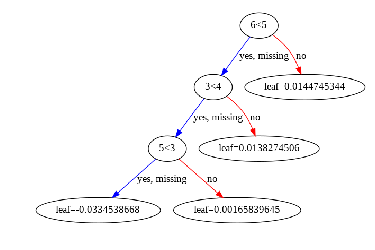

<Figure size 7200x7200 with 0 Axes>

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_tree
xgb=XGBClassifier(n_estimators=200,learning_rate=0.09,n_jobs=-1,booster='gbtree',objective='binary:logistic',eval_metric='rmse')
xgb.fit(X_train.astype(int),y_train.astype(int))
y_pred=xgb.predict(X_test.astype(int))
cm=confusion_matrix(y_test,y_pred)
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
acc*=100
#print(acc)
#accuracies=cross_val_score(estimator=xgb,X=X_train.astype(int),y=y_train.astype(int),cv=10,n_jobs=-2)
#print(accuracies.mean()*100)
#rint(" ",accuracies.std())
#rint(cm)
#rint(classification_report(y_test, y_pred))

f,axes=plt.subplots(1,1,sharex=True,sharey=True,figsize=(10,10))



In [0]:
classifier=KerasClassifier(build_fn=build_classsifier, batch_size = 16, epochs = 300)

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [0]:
  import keras
  from keras.models import Sequential
  from keras.layers import Dense,Dropout
  from keras.layers import LeakyReLU
  classifier = Sequential()
  classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
  classifier.add(Dropout(0.2))
  classifier.add(LeakyReLU(alpha=0.6))
  #classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
  #classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  classifier.fit(X_train, y_train, batch_size = 64, epochs = 300)
  y_predN= classifier.predict(X_test)
  y_predN = (y_predN > 0.5)
  cm=confusion_matrix(y_test,y_predN)
  acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
  acc*=100
  print(acc)
  print(cm)

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/300
489/489 [==============================] - 1s 1ms/step - loss: 0.6914 - acc: 0.5644
Epoch 2/300
489/489 [==============================] - 0s 26us/step - loss: 0.6855 - acc: 0.5706
Epoch 3/300
489/489 [==============================] - 0s 28us/step - loss: 0.6795 - acc: 0.4908
Epoch 4/300
489/489 [==============================] - 0s 25us/step - loss: 0.6723 - acc: 0.4519
Epoch 5/300
489/489 [==============================] - 0s 30us/step - loss: 0.6615 - acc: 0.4622
Epoch 6/300
489/489 [==============================] - 0s 24us/step - loss: 0.6495 - acc: 0.5031
Epoch 7/300
489/489 [==============================] - 0s 23us/step - loss: 0.6427 - acc: 0.4785
Epoch 8/300
489/489 [==============================] - 0s 24us/step - loss: 0.6321 - acc: 0.4806
Epoch 9/30

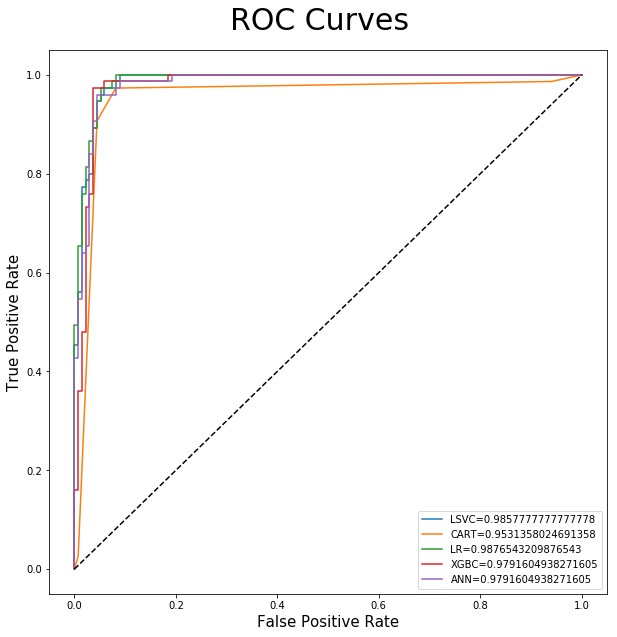

In [0]:
from sklearn import metrics
f,axes=plt.subplots(1,1,sharex=True,sharey=True,figsize=(10,10))
plt.suptitle("ROC Curves",size=30,y=0.9,va='bottom')
y_pred_proba=svc.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="LSVC="+str(auc))
plt.legend(loc=4)
"""Decsion Trees"""

y_pred_proba=clf.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="CART="+str(auc))
plt.legend(loc=4)

"""Logistic Regression"""

y_pred_proba=lr.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="LR="+str(auc))
plt.legend(loc=4)

y_pred_proba=xgb.predict_proba(X_test.astype(int))[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="XGBC="+str(auc))
plt.legend(loc=4)

y_pred_keras = classifier.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = metrics.auc(fpr_keras, tpr_keras)
plt.plot(fpr_keras,tpr_keras,label="ANN="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate",fontsize=15)
plt.ylabel("True Positive Rate",fontsize=15)
plt.show()